# Trying out the choix package

In [58]:
# Load the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('~/Downloads/eurovision_merged_covariates_03Feb.csv')

In [59]:
df.head()

,Unnamed: 0,Year,From country,Votes,Country,Own,English,Other,has_border,migration_band,migration_year,code,code3,population,count,prop_emigrants,Gender,comps_since_last_win
0,0,1999,AT,12.0,Bosnia and Herzegovina,0.0,0.0,1.0,NaN,2000,2000,BA,BIH,4179350.0,273,0.000065,group,43
1,1,1999,AT,0.0,Belgium,0.0,1.0,0.0,NaN,2000,2000,BE,BEL,10251250.0,2486,0.000243,female,12
2,2,1999,AT,0.0,Cyprus,1.0,0.0,0.0,NaN,2000,2000,CY,CYP,948237.0,161,0.000170,female,43
3,3,1999,AT,10.0,Germany,0.0,0.0,1.0,1.0,2000,2000,DE,DEU,82211508.0,181487,0.002208,group,16
4,4,1999,AT,5.0,Denmark,0.0,1.0,0.0,NaN,2000,2000,DK,DNK,5339616.0,1525,0.000286,group,35


In [60]:
import choix
import networkx as nx
import collections

#from IPython.display import Image, display

In [61]:
# convert the data to a network

def convert_to_network(df):
    network = collections.defaultdict(dict)
    for _, row in df.iterrows():
        network[row['From country']][row['Country']] = int(row['Votes'])
    return network

network = convert_to_network(df)

# create a graph of the network

def create_graph(network):
    G = nx.DiGraph()
    for country, votes in network.items():
        for vote, count in votes.items():
            G.add_edge(country, vote, weight=count)
    return G

network2 = create_graph(network)

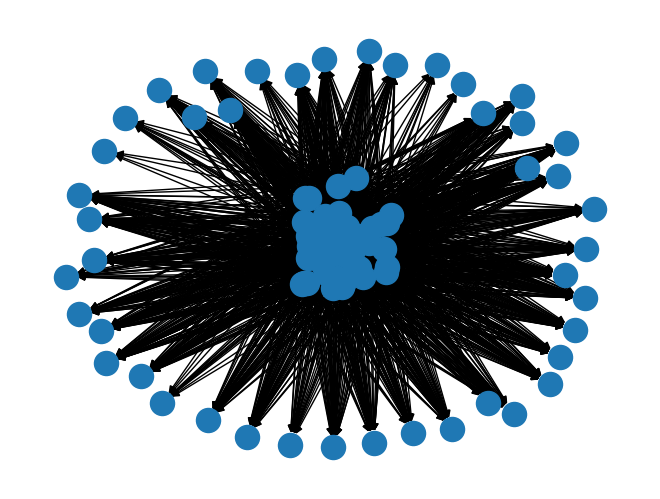

In [62]:
import networkx as nx

nx.draw(network2)

In [63]:
df_sub = df[['From country', 'code', 'Votes']]

df_sub.head()

,From country,code,Votes
0,AT,BA,12.0
1,AT,BE,0.0
2,AT,CY,0.0
3,AT,DE,10.0
4,AT,DK,5.0


In [64]:
temp = list(set(df_sub['From country'])) +  list(set(df_sub['code']))
temp = list(set(temp))
# get the unique temp values
print(list(set(temp)))


['SI', 'CZ', 'MK', 'NL', 'IS', 'SK', 'PL', 'SM', 'HU', 'MT', 'BY', 'RO', 'TR', 'MC', 'FI', 'DE', 'CY', 'EE', 'AT', 'AM', 'HR', 'BE', 'CH', 'GE', 'GB', 'UA', 'BG', 'PT', 'BA', 'LT', 'MD', 'ES', 'AD', 'IE', 'IL', 'ME', 'AZ', 'DK', 'RU', 'IT', 'SE', 'NO', 'RS', 'AU', 'LV', 'GR', 'AL', 'FR']


In [65]:
# create a dictionary of unique temp to int
code_dict = dict(zip(temp, range(len(temp))))

print(code_dict)

# map the country code to code_dict values
df_sub['code2'] = df_sub['code'].map(code_dict)
df_sub['From country2'] = df_sub['From country'].map(code_dict)



df_sub.head()

{'SI': 0, 'CZ': 1, 'MK': 2, 'IS': 3, 'NL': 4, 'SK': 5, 'SM': 6, 'PL': 7, 'HU': 8, 'MT': 9, 'BY': 10, 'RO': 11, 'TR': 12, 'MC': 13, 'FI': 14, 'DE': 15, 'CY': 16, 'EE': 17, 'AT': 18, 'AM': 19, 'HR': 20, 'BE': 21, 'CH': 22, 'GE': 23, 'GB': 24, 'UA': 25, 'BG': 26, 'PT': 27, 'BA': 28, 'LT': 29, 'MD': 30, 'ES': 31, 'AD': 32, 'IE': 33, 'IL': 34, 'ME': 35, 'AZ': 36, 'DK': 37, 'RU': 38, 'IT': 39, 'SE': 40, 'NO': 41, 'RS': 42, 'AU': 43, 'LV': 44, 'GR': 45, 'AL': 46, 'FR': 47}


/var/folders/c2/_b9mpch10xs9cgrc8sq6fhfm0000gr/T/ipykernel_52074/2679152009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['code2'] = df_sub['code'].map(code_dict)
/var/folders/c2/_b9mpch10xs9cgrc8sq6fhfm0000gr/T/ipykernel_52074/2679152009.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['From country2'] = df_sub['From country'].map(code_dict)


,From country,code,Votes,code2,From country2
0,AT,BA,12.0,28,18
1,AT,BE,0.0,21,18
2,AT,CY,0.0,16,18
3,AT,DE,10.0,15,18
4,AT,DK,5.0,37,18


In [66]:
n_items = 5
data = [
    (1, 0), (0, 4), (3, 1),
    (0, 2), (2, 4), (4, 3),
]

In [67]:
# for each row create a list of tuples

data2 = []
# for each row in df_sub add the tuple
for row in df_sub.iterrows():
    data2.append(((row[1][3]), row[1][4]))

data2

[(28, 18),
 (21, 18),
 (16, 18),
 (15, 18),
 (37, 18),
 (17, 18),
 (31, 18),
 (47, 18),
 (24, 18),
 (20, 18),
 (33, 18),
 (34, 18),
 (3, 18),
 (29, 18),
 (9, 18),
 (4, 18),
 (41, 18),
 (7, 18),
 (27, 18),
 (40, 18),
 (0, 18),
 (12, 18),
 (18, 28),
 (21, 28),
 (16, 28),
 (15, 28),
 (37, 28),
 (17, 28),
 (31, 28),
 (47, 28),
 (24, 28),
 (20, 28),
 (33, 28),
 (3, 28),
 (29, 28),
 (9, 28),
 (4, 28),
 (41, 28),
 (7, 28),
 (27, 28),
 (40, 28),
 (0, 28),
 (12, 28),
 (18, 21),
 (16, 21),
 (15, 21),
 (37, 21),
 (17, 21),
 (31, 21),
 (47, 21),
 (24, 21),
 (20, 21),
 (33, 21),
 (34, 21),
 (3, 21),
 (29, 21),
 (9, 21),
 (4, 21),
 (41, 21),
 (7, 21),
 (27, 21),
 (40, 21),
 (0, 21),
 (12, 21),
 (18, 16),
 (21, 16),
 (15, 16),
 (37, 16),
 (17, 16),
 (31, 16),
 (47, 16),
 (24, 16),
 (33, 16),
 (3, 16),
 (29, 16),
 (9, 16),
 (4, 16),
 (41, 16),
 (7, 16),
 (27, 16),
 (40, 16),
 (0, 16),
 (12, 16),
 (18, 15),
 (28, 15),
 (21, 15),
 (16, 15),
 (37, 15),
 (17, 15),
 (31, 15),
 (47, 15),
 (24, 15),
 (20, 15

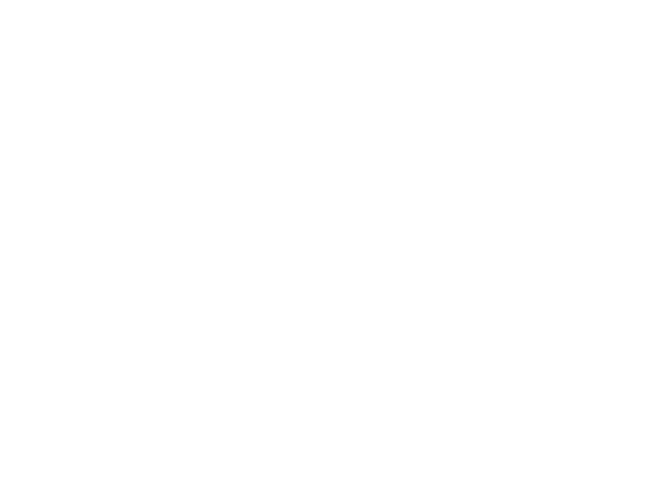

In [68]:
graph = nx.DiGraph(data=data)
nx.draw(graph, with_labels=False)

In [69]:
data2[1:10]

[(21, 18),
 (16, 18),
 (15, 18),
 (37, 18),
 (17, 18),
 (31, 18),
 (47, 18),
 (24, 18),
 (20, 18)]

In [70]:
params = choix.ilsr_pairwise(48, data2, alpha=0.05)
print(params)


[ 3.66505257e-01 -3.78813998e+00 -2.79856580e+00  7.81100636e-01
  4.40589203e-01 -2.84822321e+00 -1.43877958e+00  2.43119157e-01
  8.03511160e-01  6.61906519e-01 -3.16716367e-01  8.59392321e-01
  7.54981084e-01 -2.12259871e+00  5.01514754e-01  8.62682109e-01
  7.76284871e-01  4.59875852e-01  5.88649383e-01 -8.86001477e-01
  4.34337089e-01  3.16263858e-01  9.91212967e-02 -1.80130210e-02
  1.03904574e+00 -2.14680555e-01 -2.96076426e-03  3.47186547e-01
 -2.55369029e-01  5.57370816e-01 -4.22015713e-01  1.04854515e+00
 -2.65739384e+00  5.64422292e-01  2.18285853e-01 -9.51688983e-01
 -6.69266594e-01  8.44919822e-01  7.85532700e-01  9.96324443e-01
  1.01183393e+00  9.48598633e-01  8.90582568e-01  1.08229661e+00
  1.95225686e-01  8.39662947e-01 -1.94413602e+00  1.01488136e+00]


In [71]:
params = choix.lsr_rankings(48, data2)

/usr/local/anaconda3/lib/python3.9/site-packages/choix/utils.py:18: RuntimeWarning: divide by zero encountered in log
  params = np.log(weights)
/usr/local/anaconda3/lib/python3.9/site-packages/choix/utils.py:19: RuntimeWarning: invalid value encountered in subtract
  return params - params.mean()


In [72]:
params

array([inf, nan, inf, inf, inf, nan, inf, inf, inf, inf, inf, inf, inf,
       nan, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, nan, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf])

There is a [solution](https://stats.stackexchange.com/questions/417079/weighted-pairwise-comparison-with-table-like-heterogeneous-data-is-bradley-ter) using Plackett Luce models, which sounds like the right thing BUT there is no was to feed in the covariates. The probabilities are solely based on the rankings - no way to give context. 

We would need to rethink the code to allow for covariates - but perhaps this is beyond a TDS. 

Maybe we want to follow the [NHL example](https://arxiv.org/pdf/2101.04040.pdf) using [GAS](https://github.com/vladimirholy/gasmodel)

# XGBoost to predict if score given

First step in the hurdle model.

Example: https://www.kaggle.com/code/sriharinitumu/light-gbm-with-hurdle-modelling

In [73]:
df.head()

,Unnamed: 0,Year,From country,Votes,Country,Own,English,Other,has_border,migration_band,migration_year,code,code3,population,count,prop_emigrants,Gender,comps_since_last_win
0,0,1999,AT,12.0,Bosnia and Herzegovina,0.0,0.0,1.0,NaN,2000,2000,BA,BIH,4179350.0,273,0.000065,group,43
1,1,1999,AT,0.0,Belgium,0.0,1.0,0.0,NaN,2000,2000,BE,BEL,10251250.0,2486,0.000243,female,12
2,2,1999,AT,0.0,Cyprus,1.0,0.0,0.0,NaN,2000,2000,CY,CYP,948237.0,161,0.000170,female,43
3,3,1999,AT,10.0,Germany,0.0,0.0,1.0,1.0,2000,2000,DE,DEU,82211508.0,181487,0.002208,group,16
4,4,1999,AT,5.0,Denmark,0.0,1.0,0.0,NaN,2000,2000,DK,DNK,5339616.0,1525,0.000286,group,35


0.0     8859
12.0     715
10.0     680
7.0      663
8.0      657
1.0      656
3.0      652
6.0      652
5.0      651
4.0      635
2.0      632
Name: Votes, dtype: int64


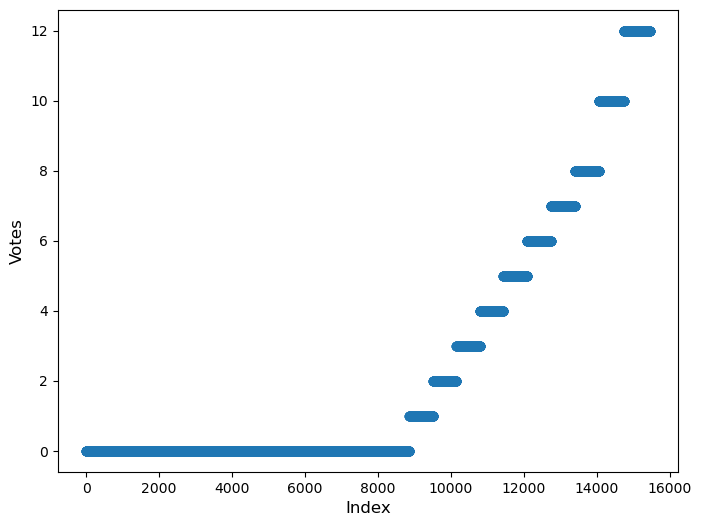

In [74]:
# order df by votes
print(df['Votes'].value_counts())

plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df["Votes"].values))
plt.xlabel('Index', fontsize=12)
plt.ylabel('Votes', fontsize=12)
plt.show()


As you can see we have a lot of zeroes....this probably makes this problem appropriate for a hurdle model. Where we first decide if a score is given, and then if it is, we predict the score.

In [75]:
df_xgboost = df[['Year', 'From country', 'Votes', 'Own',
       'English', 'Other', 'has_border', 
       'code', 'prop_emigrants', 'Gender', 'comps_since_last_win']]

df_xgboost['has_border'] = df_xgboost['has_border'].fillna(0)
df_xgboost['received_vote'] = df_xgboost['Votes'].apply(lambda x: 1 if x > 0 else 0)

df_xgboost.head()

/var/folders/c2/_b9mpch10xs9cgrc8sq6fhfm0000gr/T/ipykernel_52074/696519571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['has_border'] = df_xgboost['has_border'].fillna(0)
/var/folders/c2/_b9mpch10xs9cgrc8sq6fhfm0000gr/T/ipykernel_52074/696519571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['received_vote'] = df_xgboost['Votes'].apply(lambda x: 1 if x > 0 else 0)


,Year,From country,Votes,Own,English,Other,has_border,code,prop_emigrants,Gender,comps_since_last_win,received_vote
0,1999,AT,12.0,0.0,0.0,1.0,0.0,BA,0.000065,group,43,1
1,1999,AT,0.0,0.0,1.0,0.0,0.0,BE,0.000243,female,12,0
2,1999,AT,0.0,1.0,0.0,0.0,0.0,CY,0.000170,female,43,0
3,1999,AT,10.0,0.0,0.0,1.0,1.0,DE,0.002208,group,16,1
4,1999,AT,5.0,0.0,1.0,0.0,0.0,DK,0.000286,group,35,1


In [76]:
X = df_xgboost[["Year", "From country", "code",
        "Own", "English", "Other", "has_border",   
        "prop_emigrants", "Gender",
        "comps_since_last_win"]]
Y = df_xgboost["received_vote"]


# one hot encode the gender, from country and code
for j in ['Gender', 'From country', 'code']:
    j_text = '_voting' if j == 'From country' else ''
    for i in X[j].unique():
        X[i+j_text] = X[j].apply(lambda x: 1 if x == i else 0)

    X = X[X.columns.drop(j)]


# convert Y to int
Y = Y.astype(int)

print(X.head())
print(Y.value_counts()/len(Y))

/var/folders/c2/_b9mpch10xs9cgrc8sq6fhfm0000gr/T/ipykernel_52074/521988880.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i+j_text] = X[j].apply(lambda x: 1 if x == i else 0)


   Year  Own  English  Other  has_border  prop_emigrants  \
0  1999  0.0      0.0    1.0         0.0        0.000065   
1  1999  0.0      1.0    0.0         0.0        0.000243   
2  1999  1.0      0.0    0.0         0.0        0.000170   
3  1999  0.0      0.0    1.0         1.0        0.002208   
4  1999  0.0      1.0    0.0         0.0        0.000286   

   comps_since_last_win  group  female  male  ...  BG  GE  RS  BY  AZ  IT  ME  \
0                    43      1       0     0  ...   0   0   0   0   0   0   0   
1                    12      0       1     0  ...   0   0   0   0   0   0   0   
2                    43      0       1     0  ...   0   0   0   0   0   0   0   
3                    16      1       0     0  ...   0   0   0   0   0   0   0   
4                    35      1       0     0  ...   0   0   0   0   0   0   0   

   SM  AU  MK  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 102 columns]
0    0.573324
1    0.426676
Name

In [77]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [78]:
# fit model no training data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [79]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

<AxesSubplot:>

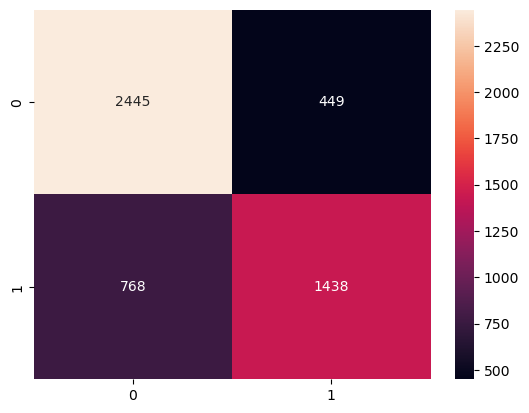

In [81]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# print a confusion matrix heatmap

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d")


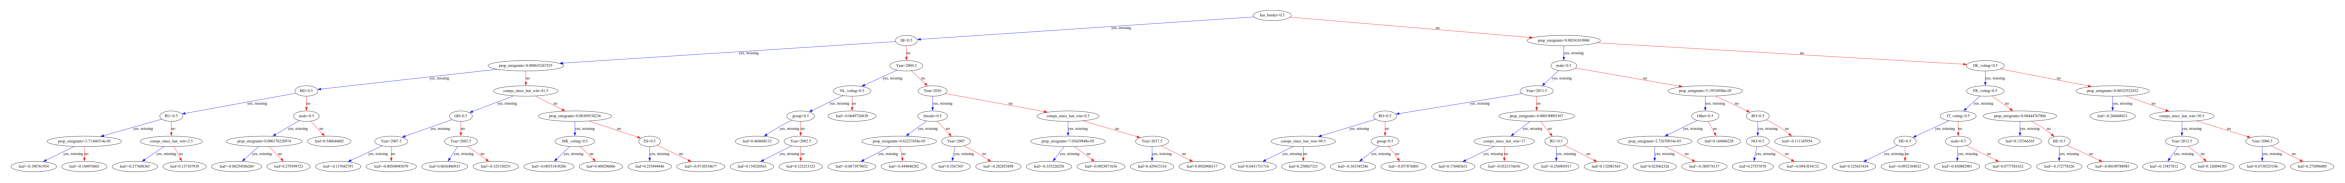

In [82]:
import matplotlib

graph = xgb.to_graphviz(model, num_trees=1, rankdir='LR')

fig, ax = plt.subplots(figsize=(30, 50))
xgb.plot_tree(model, num_trees=1, ax=ax)

# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(150, 100)


# fig.savefig('/Users/kgoldmann/Desktop/tree.png')
#plt.gcf().set_size_inches(18.5, 20.5)
plt.show()
# Get feature importances
#model.feature_importances_

First node = has_border !

## Ranking Score

So of those, lets subset to only those that have a score.

In [453]:
# subset to those with a score

df2 = df[["Year", "From country", "code",
        "Own", "English", "Other", "has_border",   
        "prop_emigrants", "Gender",
        "comps_since_last_win", "Votes"]]

df2 = df2.loc[df2['Votes'] > 0]

df2['has_border'] = df2['has_border'].fillna(0)
df2 = df2.rename(columns={"Votes": 'rank'})
#df2 = df2.rename(columns={"From country": 'id'})

df2['rank'] = df2['rank'].astype(int) - 1

df2['id'] = df2['From country'].astype(str) + df2['Year'].astype(str)


# one hot encode the gender, from country and code
for j in ['Gender', 'code', 'From country']:
    j_text = "_voting" if j == 'From country' else ''
    for i in df2[j].unique():
        df2[i+j_text] = df2[j].apply(lambda x: 1 if x == i else 0)

    df2 = df2[df2.columns.drop(j)]

#df2= df2[df2.columns.drop('From country')]
df2= df2[df2.columns.drop('Year')]

from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(test_size=.40, n_splits=1, random_state = 7).split(df2, groups=df2['id'])

X_train_inds, X_test_inds = next(gss)

train_data= df2.iloc[X_train_inds]
X_train = train_data.loc[:, ~train_data.columns.isin(['id','rank'])]
y_train = train_data.loc[:, train_data.columns.isin(['rank'])]

groups = train_data.groupby('id').size().to_frame('size')['size'].to_numpy()

test_data= df.iloc[X_test_inds]

#We need to keep the id for later predictions
X_test = test_data.loc[:, ~test_data.columns.isin(['rank'])]
y_test = test_data.loc[:, test_data.columns.isin(['rank'])]

In [454]:
train_data.head()

,Own,English,Other,has_border,prop_emigrants,comps_since_last_win,rank,id,group,female,...,AM_voting,CZ_voting,GE_voting,ME_voting,RS_voting,AZ_voting,SM_voting,SK_voting,IT_voting,AU_voting
0,0.0,0.0,1.0,0.0,0.000065,43,11,AT1999,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,1.0,1.0,0.002208,16,9,AT1999,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,0.0,0.0,0.000286,35,4,AT1999,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,1.0,0.0,0.0,0.000000,43,2,AT1999,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1.0,0.0,0.0,0.0,0.000327,43,7,AT1999,0,1,...,0,0,0,0,0,0,0,0,0,0


In [464]:
import xgboost as xgb

model = xgb.XGBRanker(  
    tree_method='hist',
    booster='gbtree',
    objective='rank:pairwise',
    random_state=7, 
    learning_rate=0.1,
    colsample_bytree=0.9, 
    eta=0.05, 
    max_depth=10, 
    n_estimators=110, 
    subsample=0.75 
    )

model.fit(X_train, y_train, group=groups, verbose=True)

XGBRanker(base_score=None, booster='gbtree', callbacks=None,
          colsample_bylevel=None, colsample_bynode=None, colsample_bytree=0.9,
          early_stopping_rounds=None, enable_categorical=False, eta=0.05,
          eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          learning_rate=0.1, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, n_estimators=110, n_jobs=None,
          num_parallel_tree=None, predictor=None, ...)

In [465]:
X_train.head()

,Own,English,Other,has_border,prop_emigrants,comps_since_last_win,group,female,male,BA,...,AM_voting,CZ_voting,GE_voting,ME_voting,RS_voting,AZ_voting,SM_voting,SK_voting,IT_voting,AU_voting
0,0.0,0.0,1.0,0.0,0.000065,43,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,1.0,1.0,0.002208,16,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,0.0,0.0,0.000286,35,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,1.0,0.0,0.0,0.000000,43,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.0,0.0,0.0,0.0,0.000327,43,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [466]:
temp = df2[X_train.columns.tolist() + ['rank', 'id']]

In [467]:
def predict(model, df):
    df = df[train_data.columns]
    return model.predict(df.loc[:, ~df.columns.isin(['id', 'rank'])])
  
predictions = (temp.groupby('id').apply(lambda x: predict(model, x)))

See [here](https://discuss.xgboost.ai/t/evaluating-xgboost-ranking/959/2) for description of prediction scores

In [468]:
# for each id add the prediction to the dataframe
temp['prediction'] = np.nan

from scipy.stats import rankdata

for i in predictions.index:
    preds = predictions.loc[i]

    # get the order of the predictions
    #temp = sorted(preds)   
    res = rankdata(preds, method='ordinal')

    temp.loc[temp['id'] == i, 'prediction'] = res

    # create a score for top 10 predictions getting 1:10 and others 0
    top10 = temp.loc[temp['id'] == i, 'prediction'].nlargest(10).values


    temp.loc[temp['id'] == i, 'score'] = temp.loc[temp['id'] == i, 'prediction'].apply(lambda x: x if x in top10 else 0)
    
    # if not zero subtract min(top10) 
    temp.loc[temp['id'] == i, 'score'] = temp.loc[temp['id'] == i, 'score'].apply(lambda x: x - min(top10) + 1 if x != 0 else 0)

    # if 10 set to 12
    temp.loc[temp['id'] == i, 'score'] = temp.loc[temp['id'] == i, 'score'].apply(lambda x: 12 if x == 10 else x)
    temp.loc[temp['id'] == i, 'score'] = temp.loc[temp['id'] == i, 'score'].apply(lambda x: 10 if x == 9 else x)


temp['rank'] = temp['rank'] + 1


/var/folders/c2/_b9mpch10xs9cgrc8sq6fhfm0000gr/T/ipykernel_52074/126382994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['prediction'] = np.nan
/var/folders/c2/_b9mpch10xs9cgrc8sq6fhfm0000gr/T/ipykernel_52074/126382994.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[temp['id'] == i, 'score'] = temp.loc[temp['id'] == i, 'prediction'].apply(lambda x: x if x in top10 else 0)
/var/folders/c2/_b9mpch10xs9cgrc8sq6fhfm0000gr/T/ipykernel_52074/126382994.py:29: SettingWithCopyWarning: 
A val

Text(0, 0.5, 'Predicted Score')

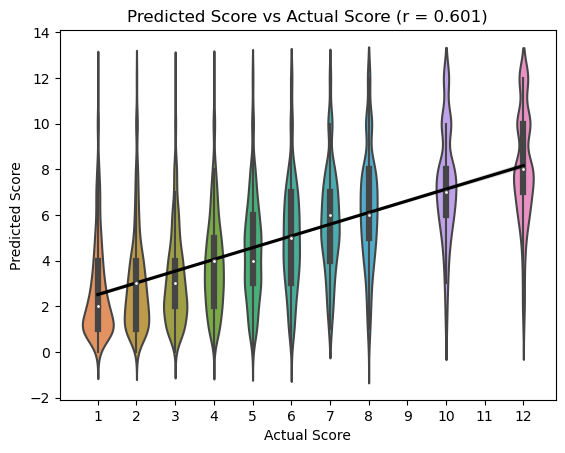

In [469]:
# violin plot of predictions for each rank
sns.violinplot(x="rank", y="score", data=temp, order=range(0, 13))

# add a best fit line - scale is wrong because numeric on top of categorical
sns.regplot(x="rank", y="score", data=temp, scatter=False, color='black')

# add the best fit correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(temp['rank'], temp['score'])
plt.title('Predicted Score vs Actual Score (r = ' + str(round(corr, 4)) + ')')

# set x label
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')

Text(0.5, 0, 'Predicted Score')

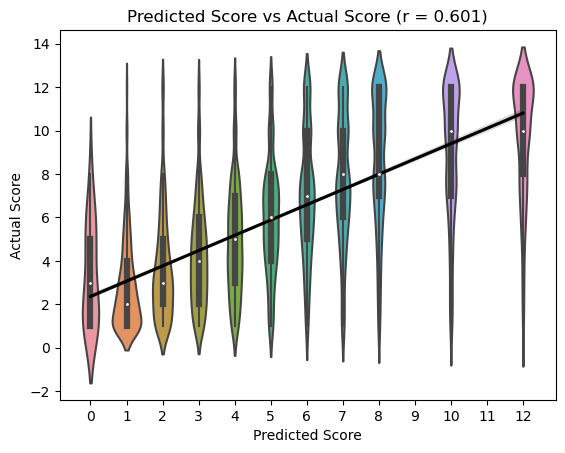

In [470]:
sns.violinplot(x="score", y="rank", data=temp, order=range(0, 13))

# add a best fit line - scale is wrong because numeric on top of categorical
sns.regplot(x="score", y="rank", data=temp, scatter=False, color='black')

# add the best fit correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(temp['score'], temp['rank'])
plt.title('Predicted Score vs Actual Score (r = ' + str(round(corr, 4)) + ')')

plt.ylabel('Actual Score')
plt.xlabel('Predicted Score')

In [492]:
accuracy = accuracy_score(temp['rank'], temp['score'])
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 18.93%


<function matplotlib.pyplot.show(close=None, block=None)>

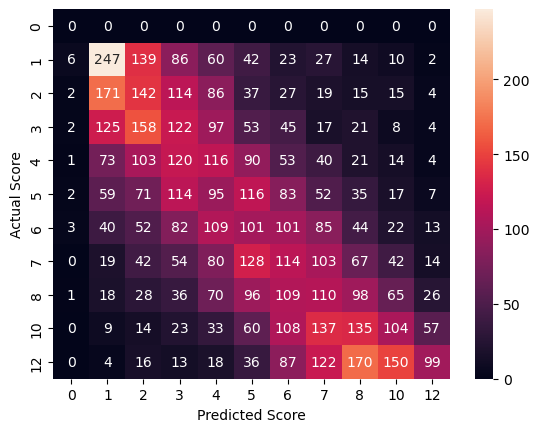

In [473]:
# confusion matrix for the predictions
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(temp['rank'], temp['score'])

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g')

# change the tick labels
plt.xticks(np.arange(0, 11, 1)+0.5, np.arange(0, 9, 1).tolist() + [10, 12])
plt.yticks(np.arange(0, 11, 1)+0.5, np.arange(0, 9, 1).tolist() + [10, 12])

plt.ylabel('Actual Score')
plt.xlabel('Predicted Score')

plt.show

The 0 predictions are coming up when we have more that 10 non-zeroes (due to draws). So this actually works quite well I think. 

## Quickly see how this compares to a non pairwise rank model

In [487]:
# subset to those with a score
df_temp = df_xgboost.loc[df_xgboost['Votes'] > 0]

X = df_temp[["Year", "From country", "code",
        "Own", "English", "Other", "has_border",   
        "prop_emigrants", "Gender",
        "comps_since_last_win"]]


Y = df_temp["Votes"] - 1


# refactor 10 as 9 (minus 1)
Y = Y.apply(lambda x: 8 if x == 9 else x)
Y = Y.apply(lambda x: 9 if x == 11 else x)


# one hot encode the gender, from country and code
for j in ['Gender', 'From country', 'code']:
    j_text = '_voting' if j == 'From country' else ''
    for i in X[j].unique():
        X[i+j_text] = X[j].apply(lambda x: 1 if x == i else 0)

    X = X[X.columns.drop(j)]


# convert Y to int
Y = Y.astype(int)

print(X.head())
print(Y.value_counts()/len(Y))

   Year  Own  English  Other  has_border  prop_emigrants  \
0  1999  0.0      0.0    1.0         0.0        0.000065   
3  1999  0.0      0.0    1.0         1.0        0.002208   
4  1999  0.0      1.0    0.0         0.0        0.000286   
5  1999  1.0      1.0    0.0         0.0        0.000000   
9  1999  1.0      0.0    0.0         0.0        0.000327   

   comps_since_last_win  group  female  male  ...  RS  BG  BY  GE  AZ  IT  ME  \
0                    43      1       0     0  ...   0   0   0   0   0   0   0   
3                    16      1       0     0  ...   0   0   0   0   0   0   0   
4                    35      1       0     0  ...   0   0   0   0   0   0   0   
5                    43      1       0     0  ...   0   0   0   0   0   0   0   
9                    43      0       1     0  ...   0   0   0   0   0   0   0   

   SM  AU  MK  
0   0   0   0  
3   0   0   0  
4   0   0   0  
5   0   0   0  
9   0   0   0  

[5 rows x 102 columns]
9    0.108448
8    0.103140
6   

/var/folders/c2/_b9mpch10xs9cgrc8sq6fhfm0000gr/T/ipykernel_52074/2047633045.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i+j_text] = X[j].apply(lambda x: 1 if x == i else 0)


In [488]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [489]:
# fit model no training data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [490]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

Accuracy: 13.42%


<AxesSubplot:>

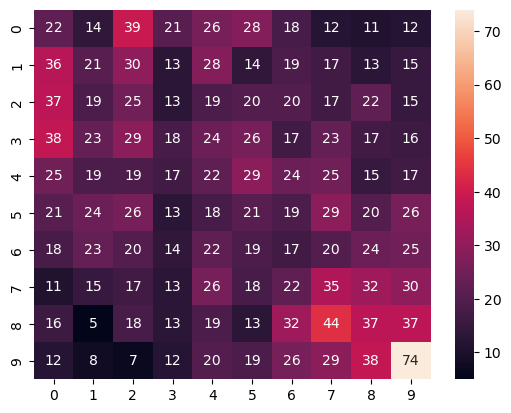

In [491]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# print a confusion matrix heatmap

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d")

So, compared to the pairwise ranked version, this is not very good. 